# Initialization
This file connects to the un-normalized Enrollment Data and performs some basic EDA on the data.

In [2]:
# importing the required libraries
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt

## Establishing connection to the SQL database
Using enrollment4EDA.db as the database file

In [3]:
# configuring the sql connection and query execution
_       = os.sep
src     = ".."+_+".."+_+".."
conn    = sqlite3.connect(src+_+"Data"+_+"EnrollmentData"+_+"enrollment4EDA.db")
cur     = conn.cursor()

def runQuery(query, commiting=False):
    cur.execute(query)
    if commiting:
        conn.commit()
    return pd.DataFrame(cur.fetchall(), columns=[i[0] for i in cur.description])

In [4]:
# example test query
runQuery("""
    SELECT rec_id, stu_id
    FROM enrollment4EDA
    LIMIT 5;
""")

,rec_id,stu_id
0,0,CEC3286
1,1,CEC3289
2,2,CEC865
3,3,CEC865
4,4,CEC901


## Importing the pandas dataframe

In [5]:
df = pd.read_pickle(
    src+_+"Data"+_+"EnrollmentData"+_+"enrollment.pkl"
)

# EDA

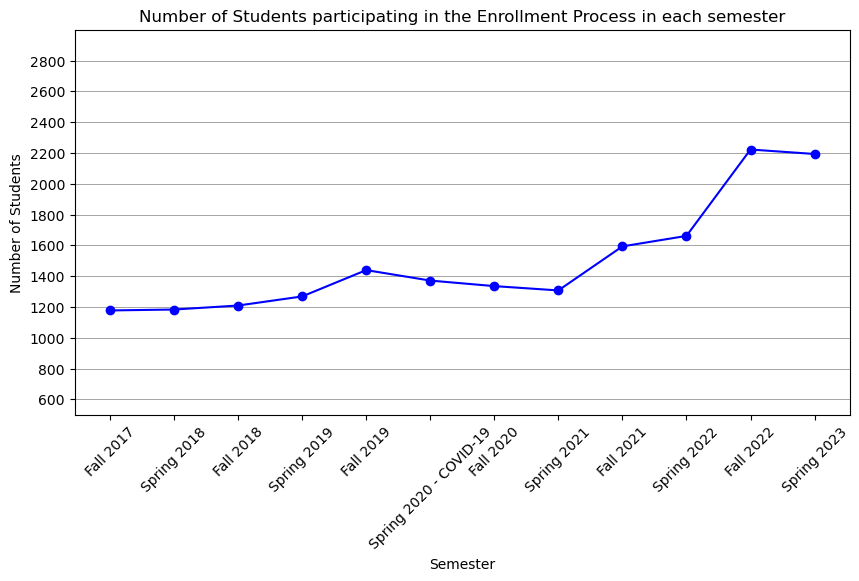

In [6]:
# Number of unique Students participating in the Enrollment Process in each semester
df_StudentPop =  runQuery("""
    SELECT reg_term_code, reg_term_desc, COUNT(DISTINCT stu_id) AS num_students
    FROM enrollment4EDA
    GROUP BY reg_term_code, reg_term_desc
    ORDER BY reg_term_code;
""")
# df_StudentPop

# Plotting the above data
plt.figure(figsize=(10,5))
plt.plot(df_StudentPop.reg_term_desc, df_StudentPop.num_students, color="blue", marker="o")

plt.grid(axis="y", color="grey", linewidth=0.5)
plt.yticks(range(600, 3000, 200))
plt.xticks(rotation=45)
plt.ylim(500, 3000)

plt.xlabel("Semester")
plt.ylabel("Number of Students")
plt.title("Number of Students participating in the Enrollment Process in each semester")

plt.show()

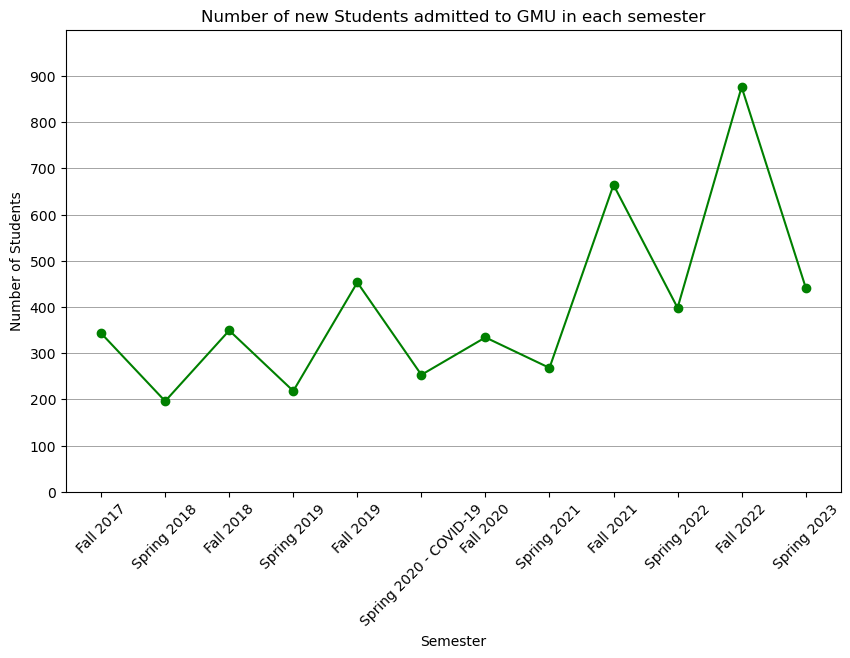

In [7]:
# Number of new Students admitted to GMU in each semester
df_AdmissionRate =  runQuery("""
    SELECT reg_term_code, reg_term_desc, COUNT(DISTINCT stu_id) AS num_students
    FROM enrollment4EDA
    WHERE stu_new_ret = "N"
    GROUP BY reg_term_code, reg_term_desc
    ORDER BY reg_term_code;
""")
# df_AdmissionRate

# Plotting the above data
plt.figure(figsize=(10,6))
plt.plot(df_AdmissionRate.reg_term_desc, df_AdmissionRate.num_students, color="green", marker="o")

plt.grid(axis="y", color="grey", linewidth=0.5)
plt.yticks(range(0, 1000, 100))
plt.xticks(rotation=45)
plt.ylim(0, 1000)

plt.xlabel("Semester")
plt.ylabel("Number of Students")
plt.title("Number of new Students admitted to GMU in each semester")

plt.show()

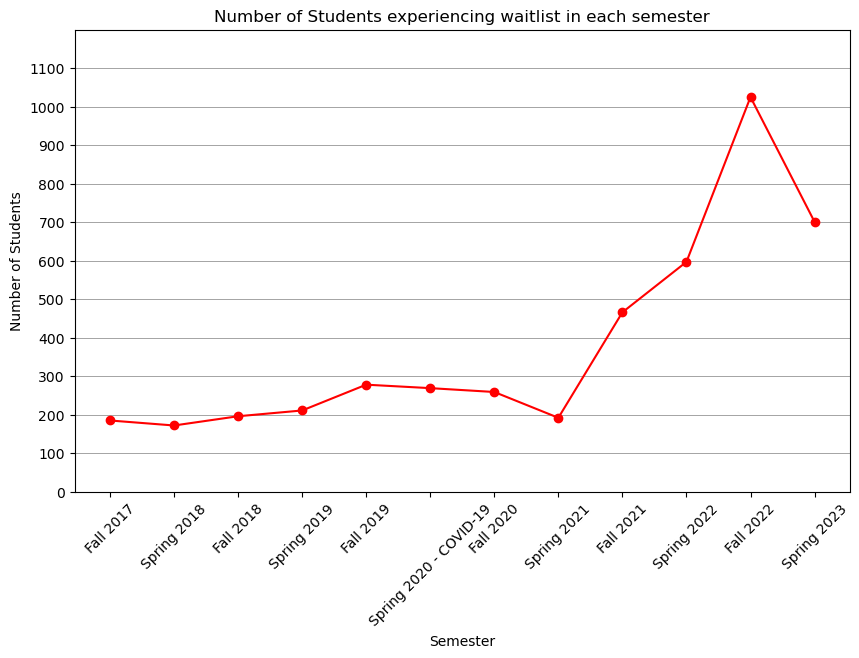

In [8]:
# Number of Students experiencing waitlist in each semester
df_Waitlists =  runQuery("""
    SELECT reg_term_code, reg_term_desc, reg_status, COUNT(DISTINCT stu_id) AS num_students
    FROM enrollment4EDA
    WHERE reg_status = "Wait Listed"
    GROUP BY reg_term_code, reg_term_desc, reg_status
    ORDER BY reg_term_code;
""")
# df_Waitlists

# Plotting the above data
plt.figure(figsize=(10,6))
plt.plot(df_Waitlists.reg_term_desc, df_Waitlists.num_students, color="red", marker="o")

plt.grid(axis="y", color="grey", linewidth=0.5)
plt.yticks(range(0, 1200, 100))
plt.xticks(rotation=45)
plt.ylim(0, 1200)

plt.xlabel("Semester")
plt.ylabel("Number of Students")
plt.title("Number of Students experiencing waitlist in each semester")

plt.show()

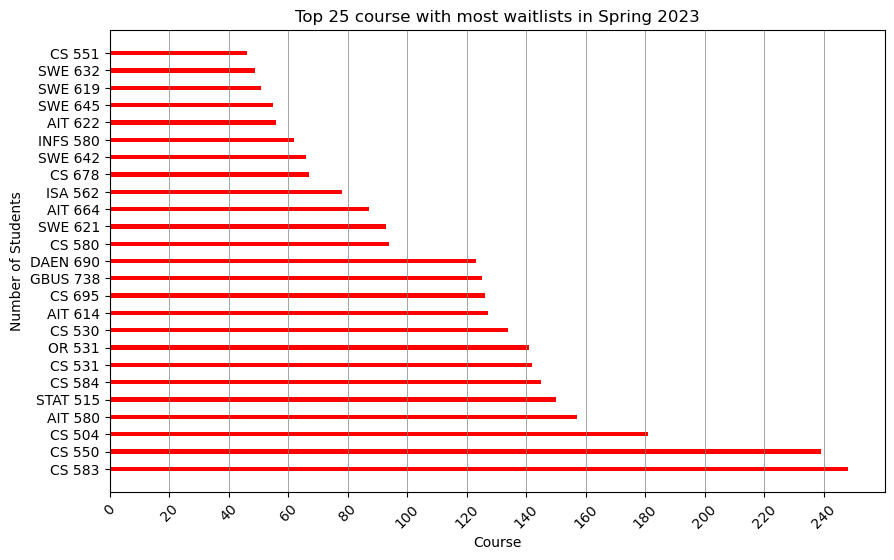

In [9]:
# Top 10 course with most waitlists in Spring 2023
df_crsWaitlists = runQuery("""
    SELECT reg_term_code, reg_status, crs, rec_ext_date, COUNT(DISTINCT stu_id) AS num_students
    FROM enrollment4EDA
    WHERE rec_ext_date = "2023-02-15 00:00:00"
    GROUP BY reg_term_code, reg_term_desc, reg_status, crs, rec_ext_date
    ORDER BY num_students DESC
    LIMIT 25;
""")
df_crsWaitlists

# Plotting the above data
plt.figure(figsize=(10,6))
plt.barh(df_crsWaitlists.crs, df_crsWaitlists.num_students, color="red", height=0.25)

plt.grid(axis="x", color="grey", linewidth=0.5)
plt.xticks(range(0, 250, 20))
plt.xticks(rotation=45)
# plt.ylim(0, 1200)

plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.title("Top 25 course with most waitlists in Spring 2023")

plt.show()

In [69]:
df.head().T

,0,1,2,3,4
rec_id,0,1,2,3,4
rec_ext_date,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00
file_name,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...
file_index,5,6,10,11,12
reg_term_code,201770,201770,201770,201770,201770
reg_term_year,2017,2017,2017,2017,2017
reg_term_name,Fall,Fall,Fall,Fall,Fall
reg_term_desc,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017
stu_id,CEC3286,CEC3289,CEC865,CEC865,CEC901
stu_deg_level,Master,Master,Master,Master,Master
